In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Normalization
from sklearn.preprocessing import MinMaxScaler

In [2]:
raw_data = pd.read_csv("HotelCustomersDataset.csv")

## 1. Variable Specification

* ID:Customer ID

* Nationality:Country of origin. Categories are represented in the ISO 3155-3:2013

* Age:Customer’s age (in years) at the last day of the extraction period

* DaysSinceCreation: Number of days since the customer record was created (number of days elapsed between the creation date and the last day of the extraction period)

* NameHash: Name of the customer’s SHA2-256 hash string. A hash-string is the string resulting from a mathematical function that maps a string of arbitrary length to fixed-length [2]. Hash functions are used for different purposes. In this case, to allow customer’s anonymization

* DocIDHash: SHA2-256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other)

* AverageLeadTime: The average number of days elapsed between the customer’s booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer

* LodgingRevenue: Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses

* OtherRevenue: Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses

* BookingsCanceled: Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay)

* BookingsNoShowed
Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel)

* BookingsCheckedIn
Number of bookings the customer made, and which end up with a staying

* PersonsNights
The total number of persons/nights that the costumer stayed at the hotel. This value is calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children

* RoomNights
Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the booking

* DaysSinceLastStay
The number of days elapsed between the last day of the extraction and the customer’s last arrival date (of a checked-in booking). A value of -1 indicates the customer never stayed at the hotel

* DaysSinceFirstStay
The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of -1 indicates the customer never stayed at the hotel

* DistributionChannel
Distribution channel usually used by the customer to make bookings at the hotel

* MarketSegment
Current market segment of the customer

* *Binary Variable*
  * SRHighFloor
Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes)

  * SRLowFloor
Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes)

  * SRAccessibleRoom
Indication if the customer usually asks for an accessible room (0: No, 1: Yes)

  * SRMediumFloor
Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes)

  * SRBathtub
Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)

  * SRShower
Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)

  * SRCrib
Indication if the customer usually asks for a crib (0: No, 1: Yes)

  * SRKingSizeBed
Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes)

  * SRTwinBed
Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)

  * SRNearElevator
Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)

  * SRAwayFromElevator
Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)

  * SRNoAlcoholInMiniBar
Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes)

  * SRQuietRoom
Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)

## 2. Data Preprocessing

### 2.1 Data description and NaN cleaning

#### 2.1.1 Data Overview

In [3]:
raw_data.head(10)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,49.0,1095,0x1DD6DA89DEECA1841ABD572562982EE905566F4469AC...,0xAB9CEF189D944E0607A55E48023A3A5290722C0DFC1B...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,32.0,1095,0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,...,0,0,0,0,1,0,0,0,0,0
8,9,FRA,42.0,1095,0xD9D899DA4FB0CF23FDF902C1B237A30AE854FFBC79FC...,0xCCDDA9F399058BA00C9A53C107F986F1B5CECD1CEAEF...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,10,IRL,25.0,1095,0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...,0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...,96,174.0,69.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_data.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
raw_data.shape

(83590, 31)

In [6]:
raw_data.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [7]:
raw_data.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: o

#### 2.1.2 Delete Rows Contains NaN

In [8]:
raw_data.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [9]:
negative_cols = ['Age', 'AverageLeadTime']
raw_data[negative_cols] = raw_data[negative_cols].applymap(lambda x: x if x >= 0 else np.nan)
raw_data.dropna(inplace=True)
raw_data = raw_data.reset_index(drop=True)
raw_data.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [10]:
raw_data.shape

(79785, 31)

All lines containing NaN were deleted, deleting the data from 83590 lines to 79811 lines


#### 2.1.3 Check and Modify Object Variables

In [11]:
value_counts_MarketSegment = raw_data['MarketSegment'].value_counts()
value_counts_MarketSegment

MarketSegment
Other                    46189
Travel Agent/Operator    11247
Direct                   10937
Groups                    8857
Corporate                 1914
Complementary              418
Aviation                   223
Name: count, dtype: int64

In [12]:
value_counts_DistributionChannel = raw_data['DistributionChannel'].value_counts()
value_counts_DistributionChannel

DistributionChannel
Travel Agent/Operator      65667
Direct                     11307
Corporate                   2318
Electronic Distribution      493
Name: count, dtype: int64

In [13]:
value_counts_Nationality = raw_data['Nationality'].value_counts()
value_counts_Nationality

Nationality
FRA    12417
DEU    10228
GBR     8654
PRT     7817
ESP     4900
       ...  
GNQ        1
GIN        1
SWZ        1
SOM        1
NPL        1
Name: count, Length: 187, dtype: int64

In [14]:
nationality_counts = raw_data['Nationality'].value_counts(normalize=True)
threshold = 0.01

In [15]:
raw_data['Nationality'] = raw_data['Nationality'].apply(
    lambda x: x if nationality_counts[x] >= threshold else 'Other'
)

#### 2.1.4 Check Numeric Variables

##### 2.1.4.1 Binary Variables

In [16]:
binary_col = [
    'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
    'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
    'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
    'SRQuietRoom'
]

In [17]:
for col in binary_col:
    unique_values = raw_data[col].unique()
    invalid_values = [val for val in unique_values if val not in [0, 1]]

    if invalid_values:
        print(f"Column '{col}' contains invalid values: {invalid_values}")
    else:
        print(f"Column '{col}' contains only 0 and 1.")

Column 'SRHighFloor' contains only 0 and 1.
Column 'SRLowFloor' contains only 0 and 1.
Column 'SRAccessibleRoom' contains only 0 and 1.
Column 'SRMediumFloor' contains only 0 and 1.
Column 'SRBathtub' contains only 0 and 1.
Column 'SRShower' contains only 0 and 1.
Column 'SRCrib' contains only 0 and 1.
Column 'SRKingSizeBed' contains only 0 and 1.
Column 'SRTwinBed' contains only 0 and 1.
Column 'SRNearElevator' contains only 0 and 1.
Column 'SRAwayFromElevator' contains only 0 and 1.
Column 'SRNoAlcoholInMiniBar' contains only 0 and 1.
Column 'SRQuietRoom' contains only 0 and 1.


##### 2.1.4.2 Extreme Distribution Variables

In [18]:
book_number = ['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']

### 2.2 Detecting outliers

In [19]:
def thresholds(dataframe, col):
    Q1 = np.percentile(dataframe[col],25, axis=0)
    Q3 = np.percentile(dataframe[col],75, axis=0)
    IQR = Q3 - Q1
    low = Q1-1.5*IQR
    up = Q3+1.5*IQR
    return low, up

def check_outlier(dataframe, col):
    low, up = thresholds(dataframe, col)
    if dataframe[(dataframe[col] > up) | (dataframe[col] < low)].any(axis=None):
        return True
    else:
        return False

def replace_outlier(dataframe,cols):
    new_dataframe = dataframe.copy()
    for i in cols:
        low, up = thresholds(dataframe, i)
        new_dataframe.loc[(new_dataframe[i] < low), i] = low
        new_dataframe.loc[(new_dataframe[i] > up), i] = up
    return new_dataframe

In [20]:
# Check outliers of numeric columns in raw data expect the binary columns
numeric_columns = [col for col in raw_data.columns if raw_data.dtypes[col] != 'object' and col not in binary_col and col not in book_number and col != 'ID']
for col in numeric_columns:
    print(check_outlier(raw_data, col))

True
False
True
True
True
True
True
False
False


In [21]:
# Replace outliers of numeric columns and check again in train data
new_data = replace_outlier(raw_data,numeric_columns)
for i in numeric_columns:
    print(check_outlier(new_data, i))

False
False
False
False
False
False
False
False
False


### 2.3 Data visualization

#### 2.3.1 Distribution of Numeric Variables

In [22]:
numeric_columns_new = [col for col in new_data.columns if new_data.dtypes[col] != 'object' and col not in binary_col and col not in book_number and col != 'ID']

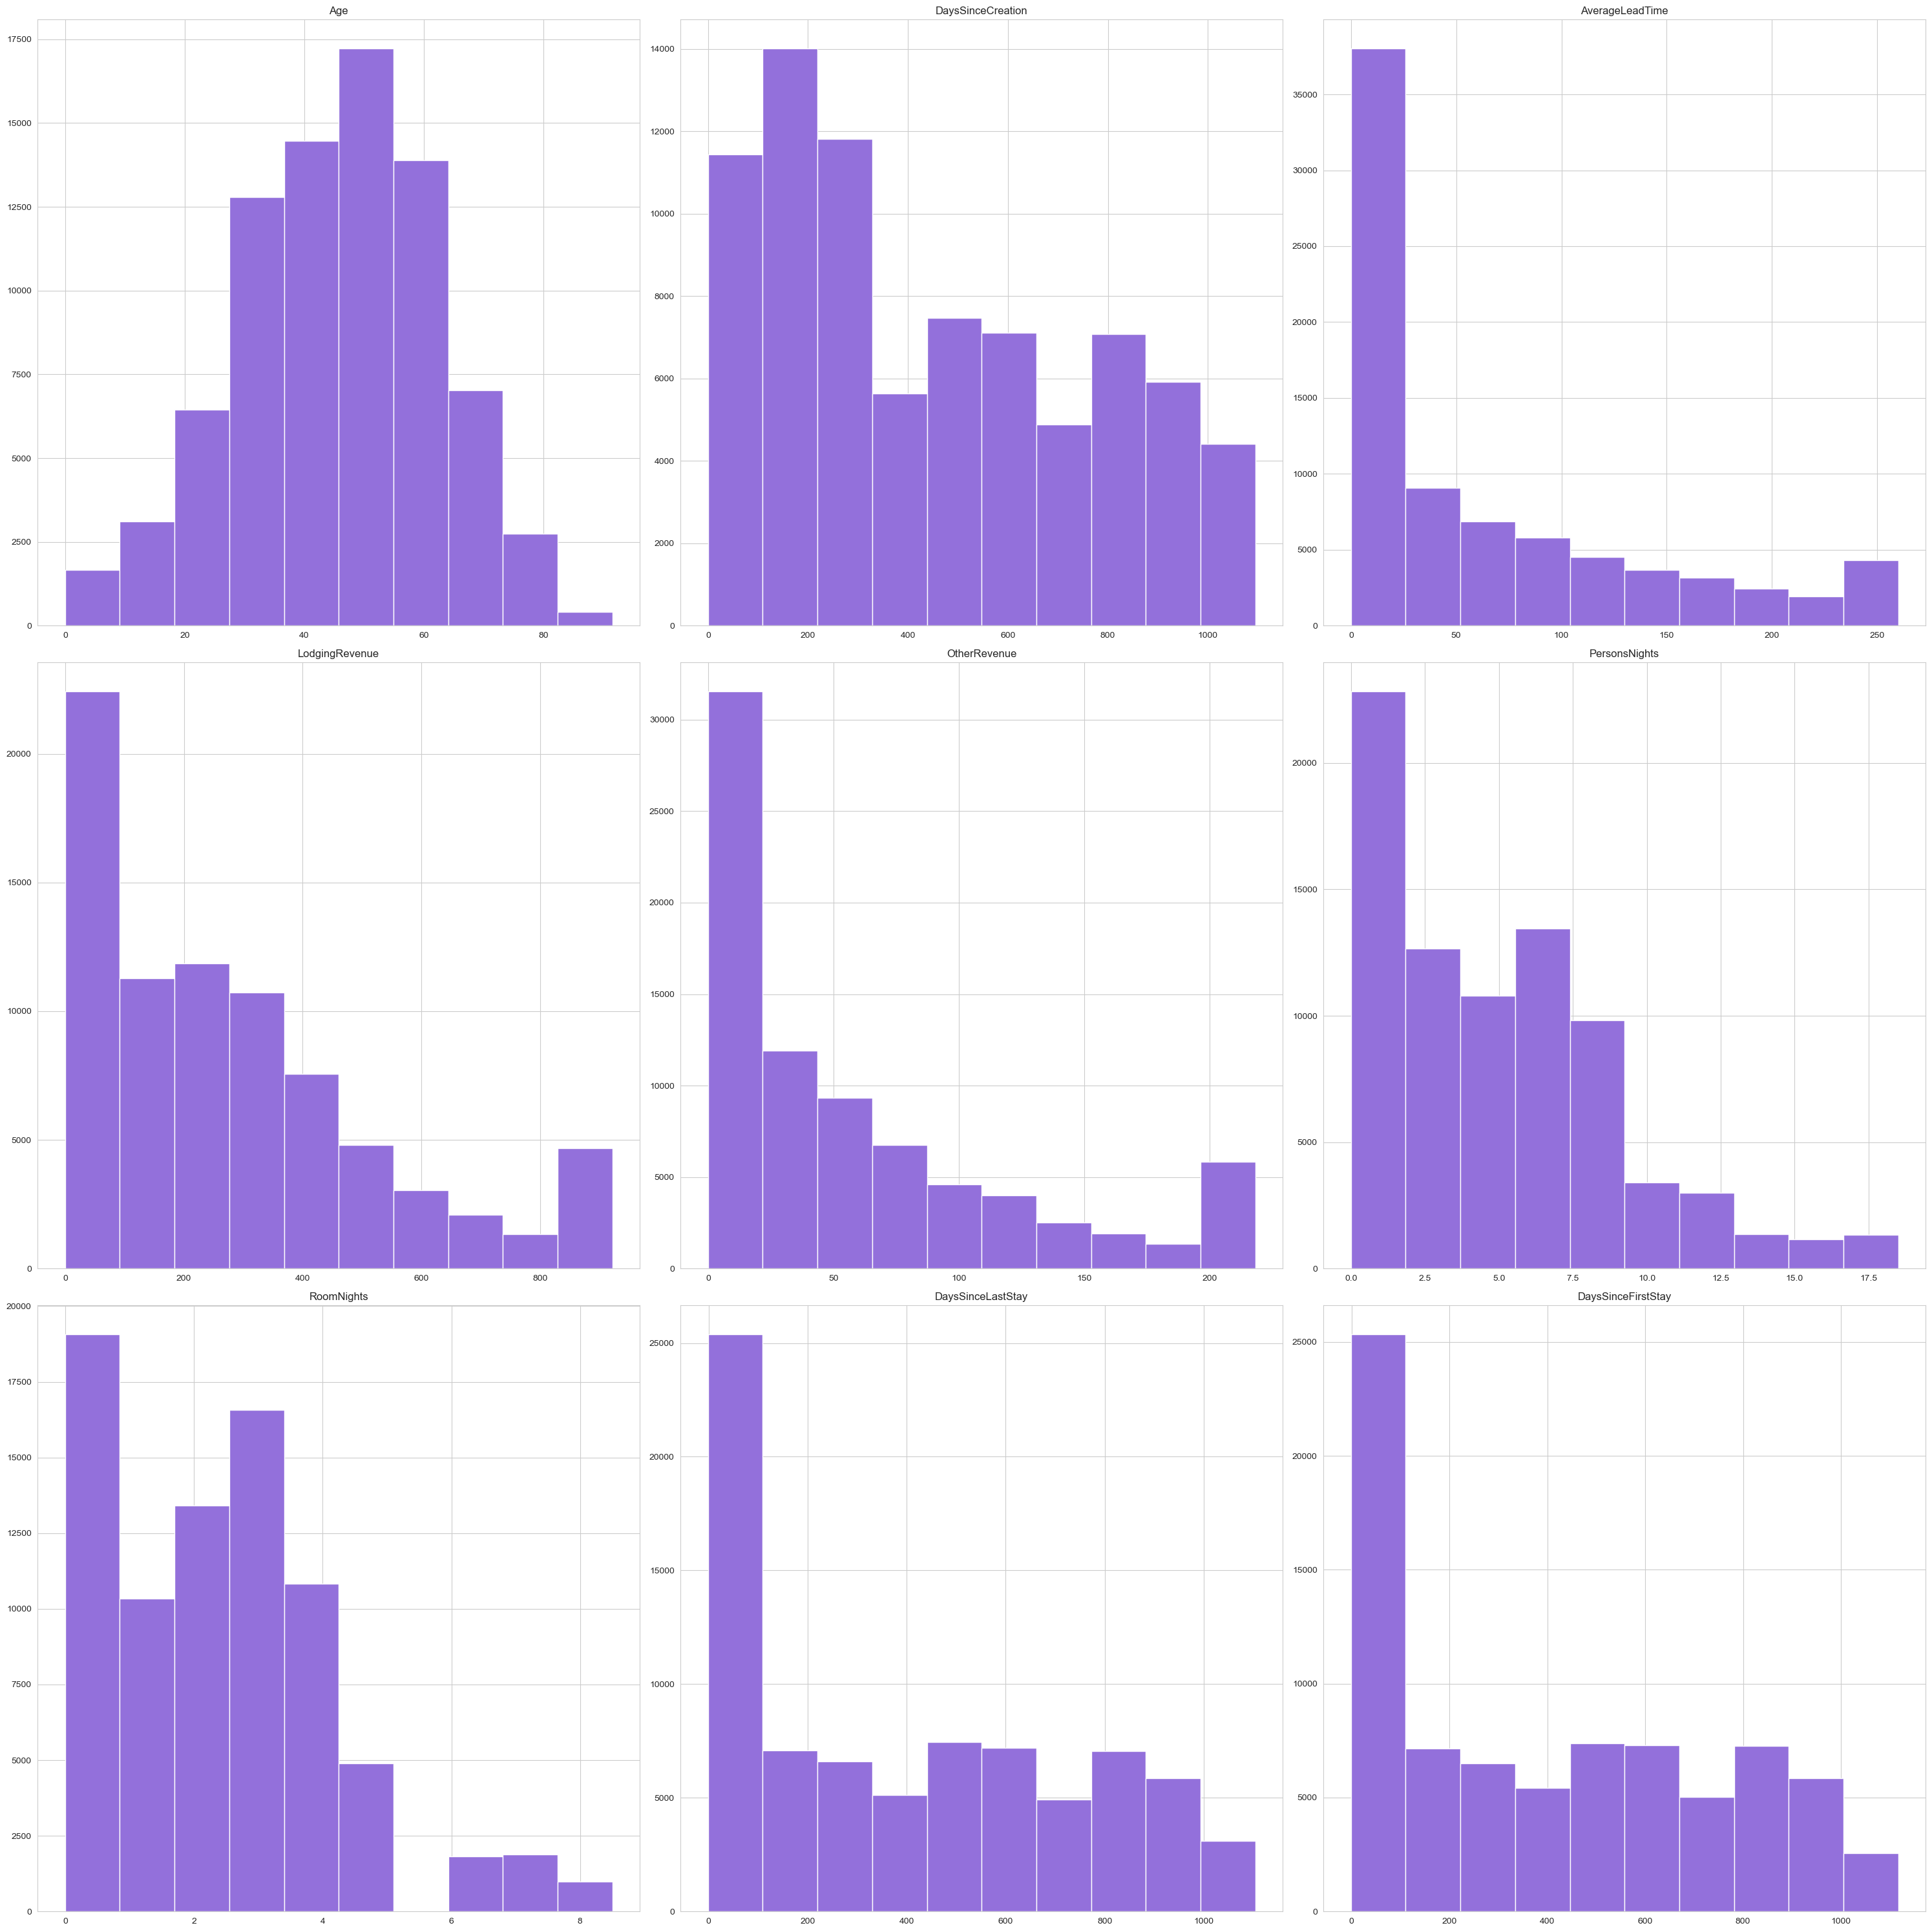

In [23]:
new_data[numeric_columns_new].hist(color='mediumpurple', figsize=(30, 30))
plt.tight_layout()
plt.show()

#### 2.3.2 Distribution of Binary Variables

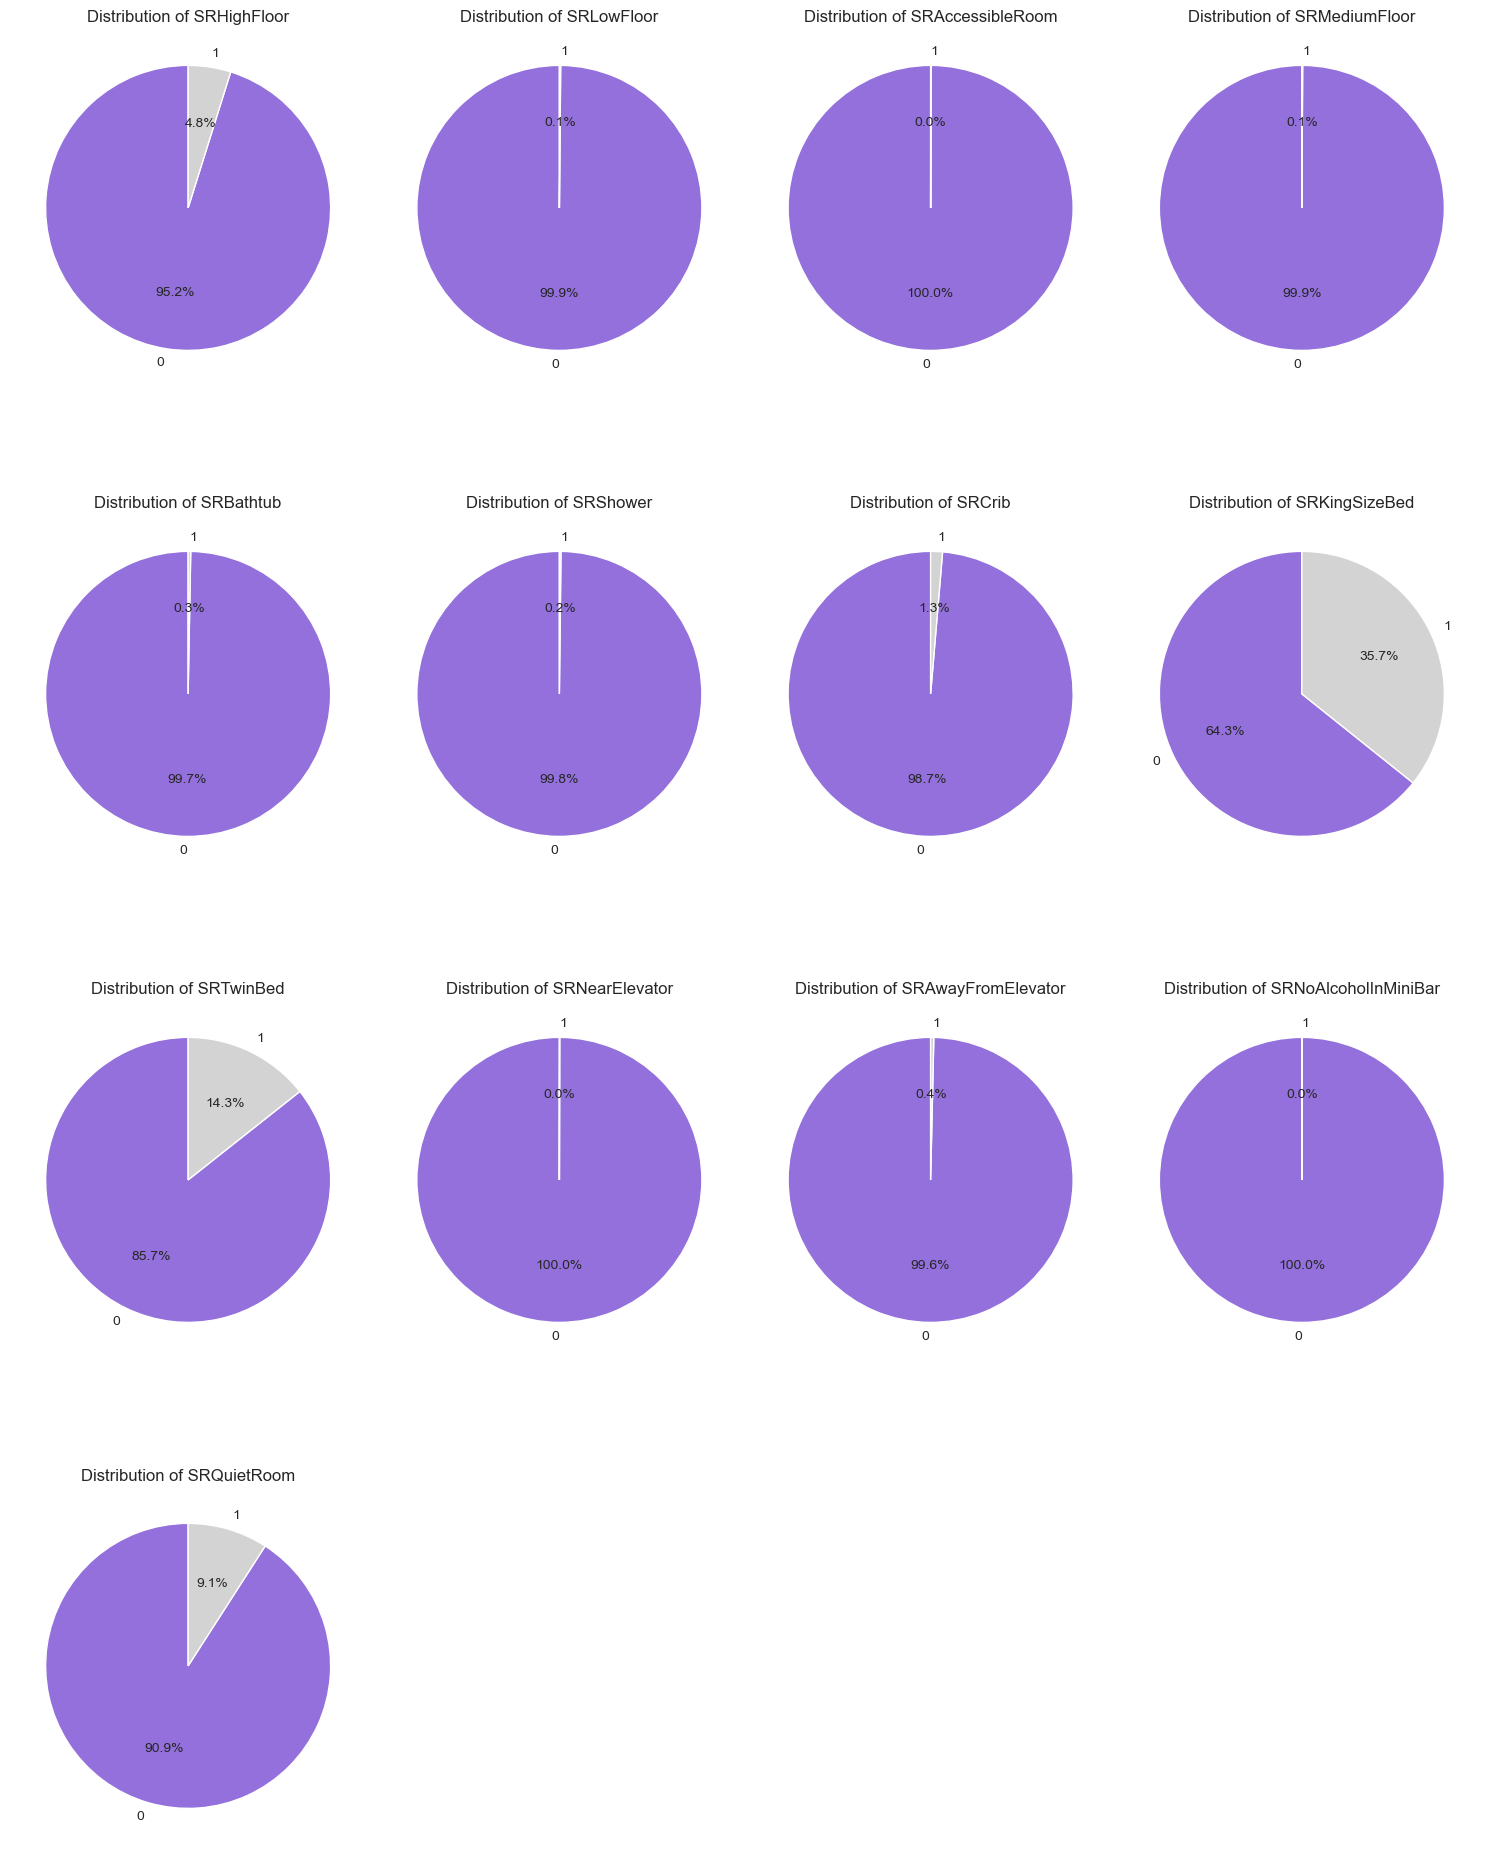

In [24]:
cols = 4
rows = (len(binary_col) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

axes = axes.flatten()

for idx, col in enumerate(binary_col):
    value_counts = new_data[col].value_counts()
    axes[idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['mediumpurple', 'lightgray'])
    axes[idx].set_title(f"Distribution of {col}")

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 2.3.3 Distribution of Object Variables

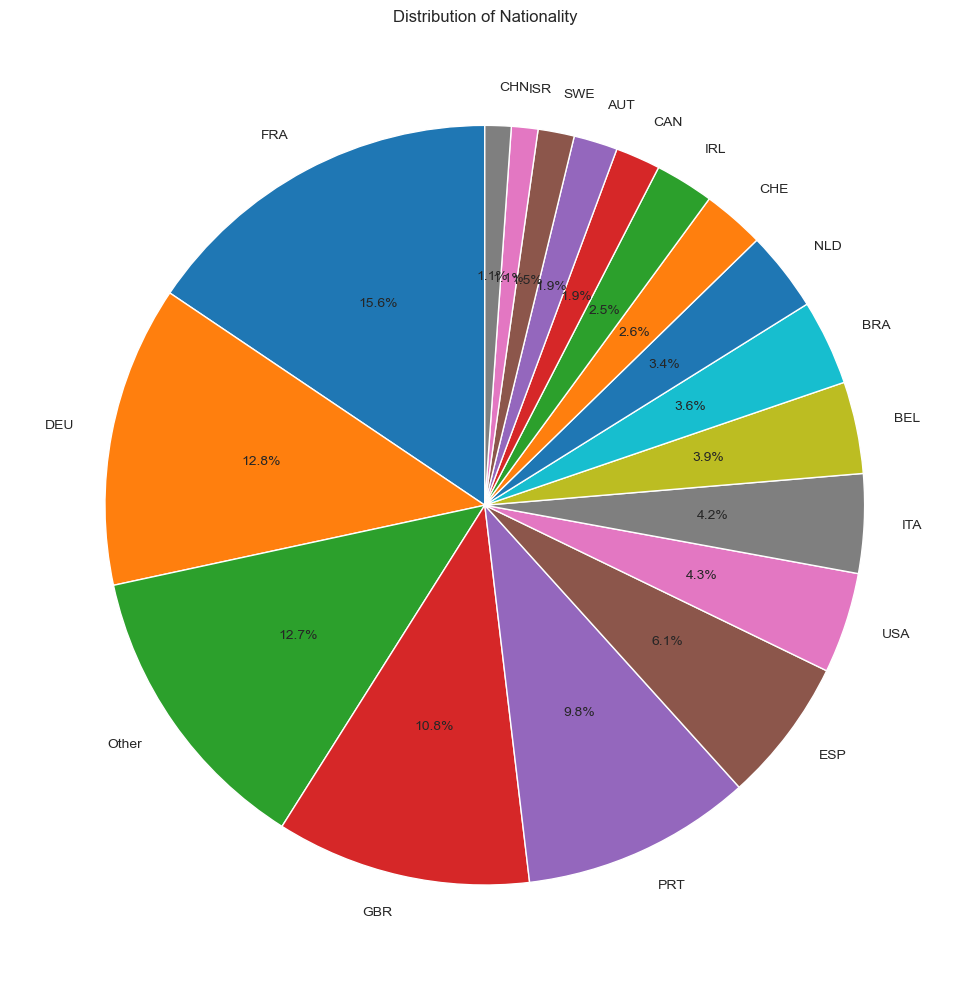

In [25]:
nationality_counts = new_data['Nationality'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Nationality')
plt.tight_layout()
plt.show()

#### 2.3.4 Distribution of list of "book_number"

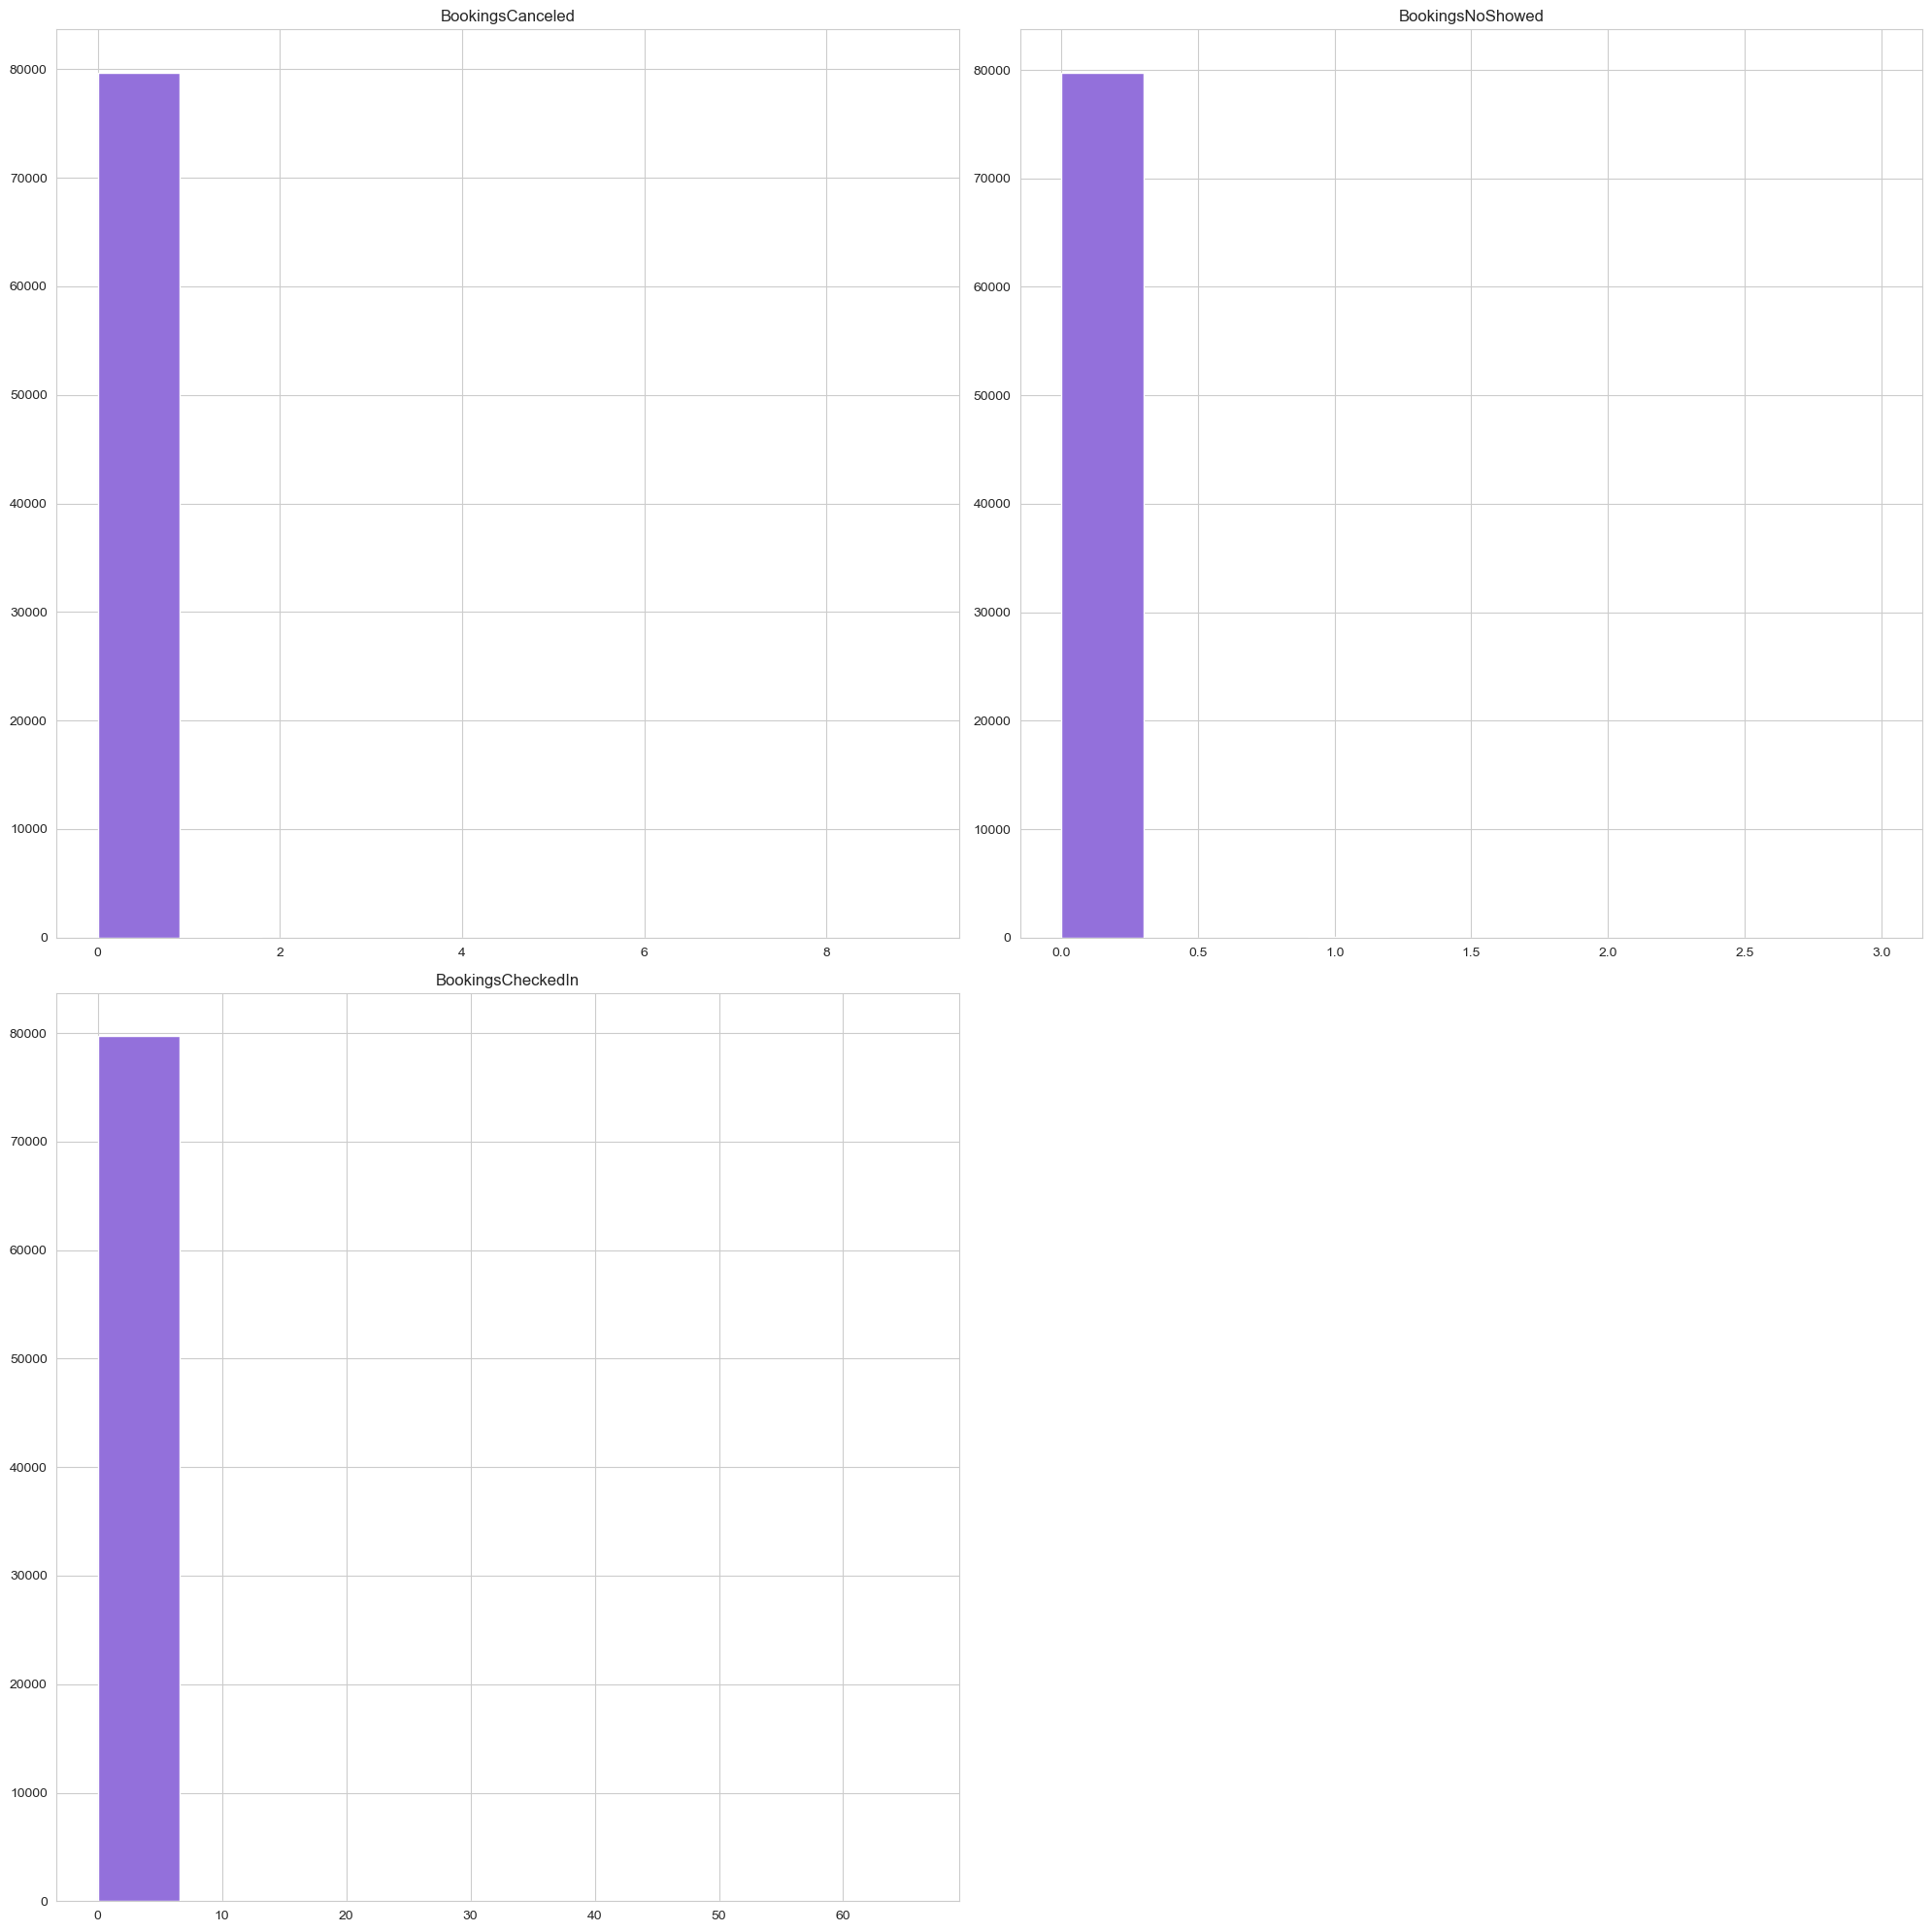

In [26]:
new_data[book_number].hist(color='mediumpurple', figsize=(20, 20))
plt.tight_layout()
plt.show()

The numbers in book_numberh are extreme to the left

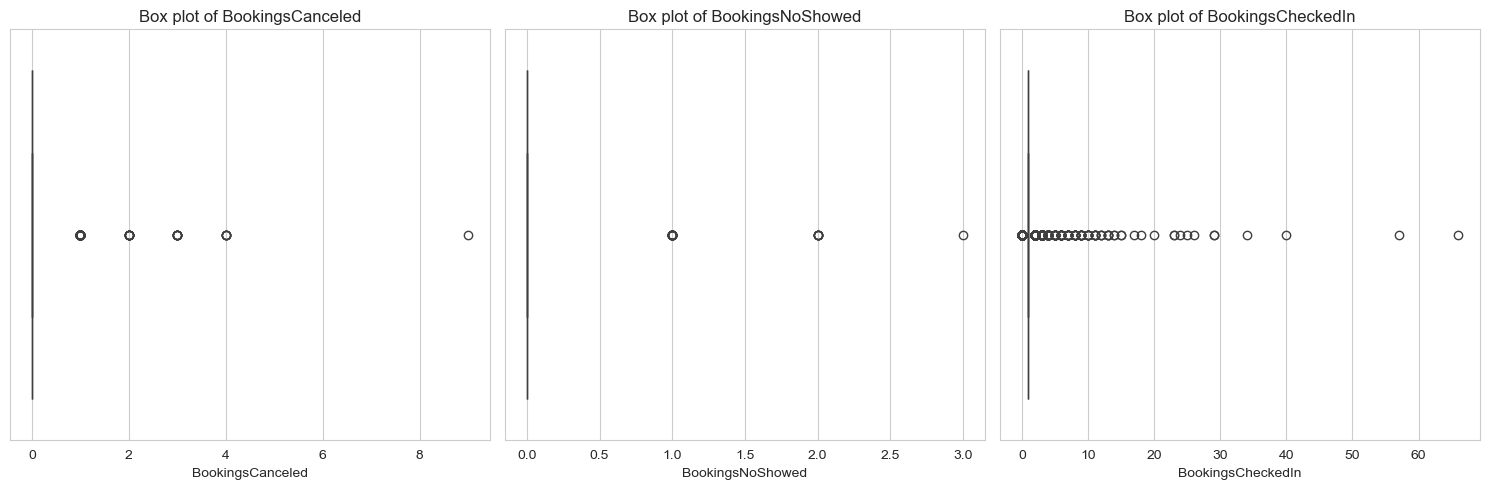

In [27]:
plt.figure(figsize=(15, 5))

for idx, col in enumerate(book_number, 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(x=new_data[col])
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

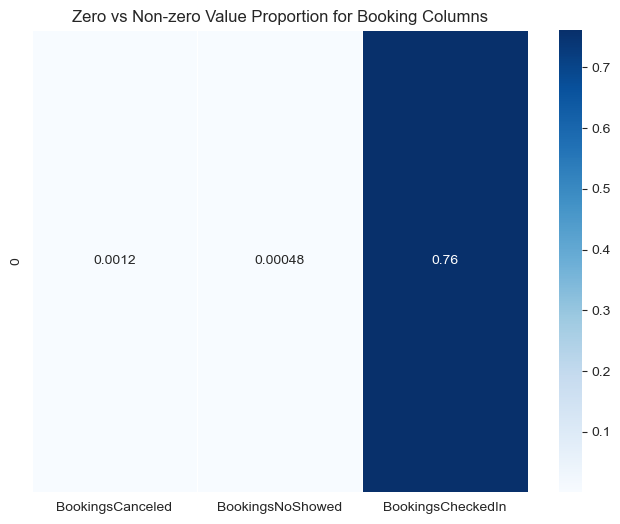

In [28]:
zero_nonzero_counts = raw_data[book_number].applymap(lambda x: 1 if x != 0 else 0)
zero_nonzero_ratio = zero_nonzero_counts.mean()
zero_nonzero_ratio_df = pd.DataFrame(zero_nonzero_ratio).T

plt.figure(figsize=(8, 6))
sns.heatmap(zero_nonzero_ratio_df, annot=True, cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Zero vs Non-zero Value Proportion for Booking Columns')
plt.show()

* Here we try to use logarithm to deal with the columns *'BookingsCanceled', 'BookingsNoShowed'*, the distribution before and after logarithm is concentrated on 0-1. We cannot see the difference, and consider deleting variables with a large proportion of zero values

In [29]:
new_data['BookingsCheckedIn'] = np.log1p(new_data['BookingsCheckedIn'] + 1e-5)

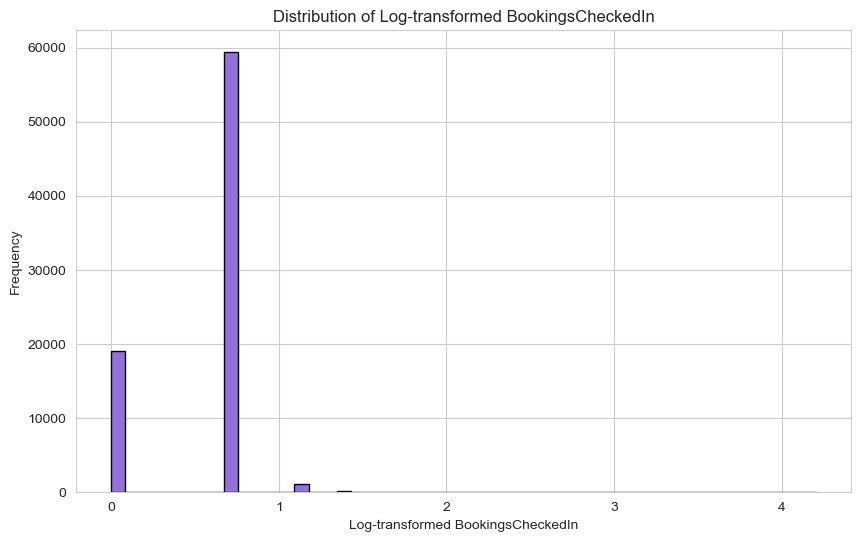

In [30]:
plt.figure(figsize=(10, 6))
new_data['BookingsCheckedIn'].hist(bins=50, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Log-transformed BookingsCheckedIn')
plt.xlabel('Log-transformed BookingsCheckedIn')
plt.ylabel('Frequency')
plt.show()

### 2.4 Feature selection

In [31]:
remove_list = ['ID', 'NameHash', 'DocIDHash', 'BookingsCanceled', 'BookingsNoShowed']

In [32]:
new_data = new_data.drop(remove_list,axis='columns')
new_data

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150.0,45.0,371.0,105.30,1.386297,8.0,5.0,151.0,...,0,0,0,0,0,0,0,0,0,0
1,DEU,31.0,1095.0,0.0,0.0,0.00,0.000010,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,FRA,60.0,1095.0,93.0,240.0,60.00,0.693152,10.0,5.0,1100.0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,51.0,1095.0,0.0,0.0,0.00,0.000010,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,Other,54.0,1095.0,58.0,230.0,24.00,0.693152,4.0,2.0,1097.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79780,ITA,54.0,0.0,0.0,0.0,0.00,0.000010,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
79781,IRL,47.0,0.0,109.0,327.1,218.25,0.693152,6.0,3.0,3.0,...,0,0,0,0,1,0,0,0,0,0
79782,IRL,53.0,0.0,0.0,0.0,0.00,0.000010,0.0,0.0,-1.0,...,0,0,0,0,1,0,0,0,0,0
79783,IRL,85.0,0.0,109.0,921.5,9.00,0.693152,6.0,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0


### 2.5 Data Normalization

In [33]:
category_columns = [col for col in new_data.columns if new_data.dtypes[col] =='object']
numeric_columns = [col for col in new_data.columns if new_data.dtypes[col] != 'object' and col not in binary_col]
binary_data = new_data[binary_col]

In [34]:
binary_data

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79780,0,0,0,0,0,0,0,0,0,0,0,0,0
79781,0,0,0,0,0,0,0,1,0,0,0,0,0
79782,0,0,0,0,0,0,0,1,0,0,0,0,0
79783,0,0,0,0,0,0,0,0,1,0,0,0,0


In [35]:
category_columns

['Nationality', 'DistributionChannel', 'MarketSegment']

In [36]:
numeric_columns

['Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'LodgingRevenue',
 'OtherRevenue',
 'BookingsCheckedIn',
 'PersonsNights',
 'RoomNights',
 'DaysSinceLastStay',
 'DaysSinceFirstStay']

In [37]:
# Normalized the numercial data: made the range of features of data fall between 0 and 1
scaler = MinMaxScaler()
num_norm = new_data.copy()
num_norm[numeric_columns] = scaler.fit_transform(new_data[numeric_columns])


In [39]:
# Normalized the category data: One-Hot-Encoding for Dummy variables
def category_norm(dataframe,cols):
    CategoryData_normalization = dataframe[cols]
    CategoryData_dummies = pd.get_dummies(CategoryData_normalization)
    CategoryData_dummies = CategoryData_dummies.astype(int)
    return CategoryData_dummies

In [40]:
category_norm = category_norm(new_data,category_columns)
category_norm

,Nationality_AUT,Nationality_BEL,Nationality_BRA,Nationality_CAN,Nationality_CHE,Nationality_CHN,Nationality_DEU,Nationality_ESP,Nationality_FRA,Nationality_GBR,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
83586,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
83587,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
83588,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [41]:
# Merge the encoded category data and the normalized numercial data
data_norm = pd.concat((num_norm.drop(category_columns,axis=1),category_norm,binary_data),axis=1)
data_norm

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0.559783,0.136986,0.176245,0.402604,0.482474,0.329701,0.432432,0.588235,0.137557,0.961538,...,0,0,0,0,0,0,0,0,0,0
2,0.342391,1.000000,0.003831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.657609,1.000000,0.360153,0.260445,0.274914,0.164850,0.540541,0.588235,0.996380,0.984794,...,0,0,0,0,0,0,0,0,0,0
4,0.559783,1.000000,0.003831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,0.592391,1.000000,0.226054,0.249593,0.109966,0.164850,0.216216,0.235294,0.993665,0.982111,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,0.592391,0.000000,0.003831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
83586,0.516304,0.000000,0.421456,0.354965,1.000000,0.164850,0.324324,0.352941,0.003620,0.003578,...,0,0,0,0,1,0,0,0,0,0
83587,0.581522,0.000000,0.003831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
83588,0.929348,0.000000,0.421456,1.000000,0.041237,0.164850,0.324324,0.352941,0.003620,0.003578,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = data_norm

# 3. Feature Engineer

## 3.1 Feature Selection

In [ ]:
# Variance Threshold: Features with high variance contribute more to the data distribution.
from sklearn.feature_selection import VarianceThreshold

# Set the variance threshold (e.g., 0.05)
selector = VarianceThreshold(threshold=0.05)
data_high_variance = selector.fit_transform(df)

# Check the retained features
selected_features = df.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")
print(f"Number of features after: {len(selected_features)}")

Selected Features: ['DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRKingSizeBed', 'SRTwinBed', 'SRQuietRoom', 'Nationality_DEU', 'Nationality_ESP', 'Nationality_FRA', 'Nationality_GBR', 'Nationality_Other', 'Nationality_PRT', 'DistributionChannel_Direct', 'DistributionChannel_Travel Agent/Operator', 'MarketSegment_Direct', 'MarketSegment_Groups', 'MarketSegment_Other', 'MarketSegment_Travel Agent/Operator', 'SRKingSizeBed.1', 'SRTwinBed.1', 'SRQuietRoom.1']
Number of features after: 26


In [ ]:
corr_matrix = df[selected_features].corr().abs()  # Calculate the correlation matrix

# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with a correlation higher than 0.9 in the upper triangle
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop redundant features
data_uncorrelated = df[selected_features].drop(columns=to_drop)

print(f"Number of features before: {df[selected_features].shape[1]}")
print(f"Number of features after: {data_uncorrelated.shape[1]}")
print(f"Remaining features: {data_uncorrelated.columns.tolist()}")

Number of features before: 26
Number of features after: 19
Remaining features: ['DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'SRKingSizeBed', 'SRTwinBed', 'SRQuietRoom', 'Nationality_DEU', 'Nationality_ESP', 'Nationality_FRA', 'Nationality_GBR', 'Nationality_Other', 'Nationality_PRT', 'DistributionChannel_Direct', 'DistributionChannel_Travel Agent/Operator', 'MarketSegment_Groups', 'MarketSegment_Other', 'MarketSegment_Travel Agent/Operator']


In [ ]:
df = data_uncorrelated

In [ ]:
# data used in Appendix
# df.to_csv('feature_selection.csv')

## 3.2 Dimensionality Reduction: PCA

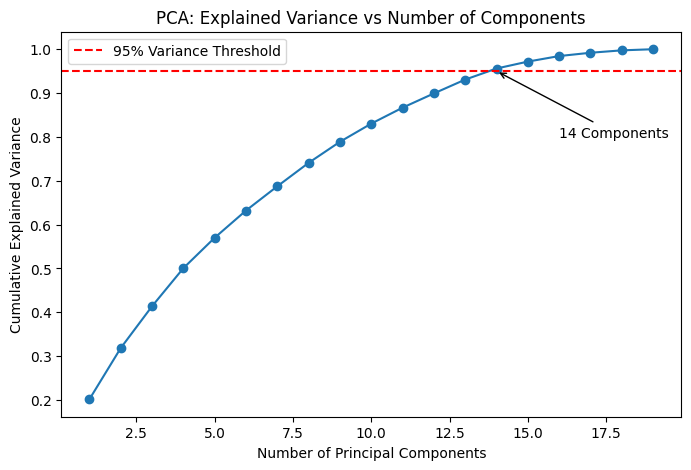

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit data and get the variance ratio of each principal component
pca.fit(df)

# Cumulative variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative variance graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
components_95 = (cumulative_variance >= 0.95).argmax() + 1
plt.annotate(f"{components_95} Components",
             xy=(components_95, 0.95),
             xytext=(components_95 + 2, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs Number of Components')
plt.legend()
plt.show()

In [ ]:
# Retain 95% variance
pca = PCA(n_components=0.95, random_state=42)  # Automatically select the number of components
pca.fit(df)
data_reduced = pca.fit_transform(df)

# Check the shape of the reduced data
print(f"Reduced data shape: {data_reduced.shape}")

Reduced data shape: (79785, 14)


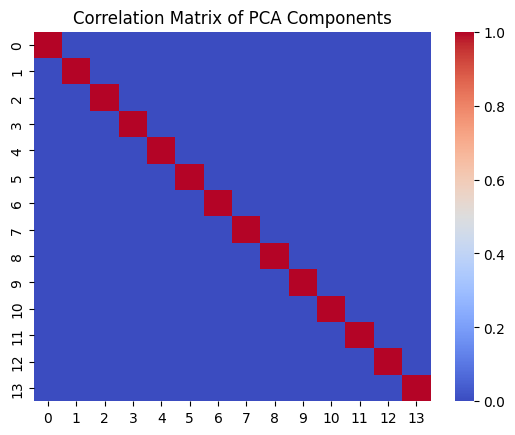

In [ ]:
# Convert the reduced data into a DataFrame
# Align indices with the original DataFrame
pca_data = pd.DataFrame(data_reduced, index=df.index)

# Plot heatmap
sns.heatmap(pca_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of PCA Components')
plt.show()

In [ ]:
# Output the variance contribution ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each component:", explained_variance)

# Cumulative variance contribution ratio
cumulative_variance = explained_variance.cumsum()
print("Cumulative explained variance ratio:", cumulative_variance)

Explained variance ratio of each component: [0.20170304 0.11684177 0.09533929 0.08678962 0.06942954 0.06199199
 0.05532276 0.05346716 0.04801459 0.04143567 0.03634453 0.03251238
 0.03158524 0.02521165]
Cumulative explained variance ratio: [0.20170304 0.31854482 0.41388411 0.50067373 0.57010327 0.63209526
 0.68741802 0.74088518 0.78889976 0.83033544 0.86667997 0.89919235
 0.93077759 0.95598923]


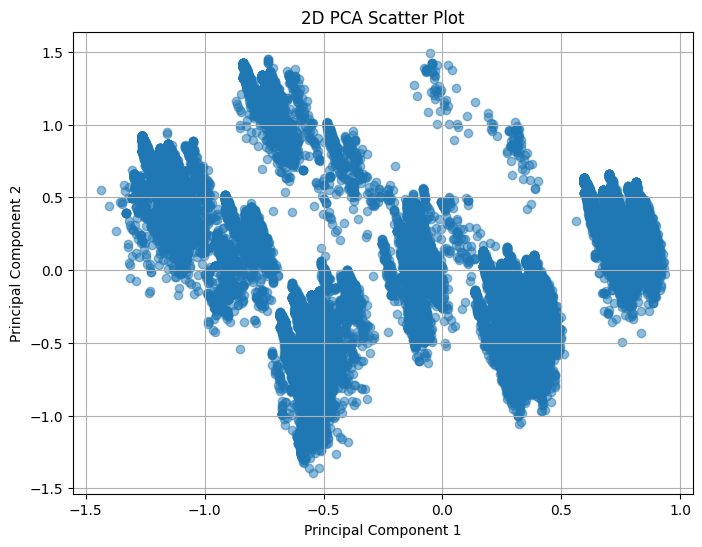

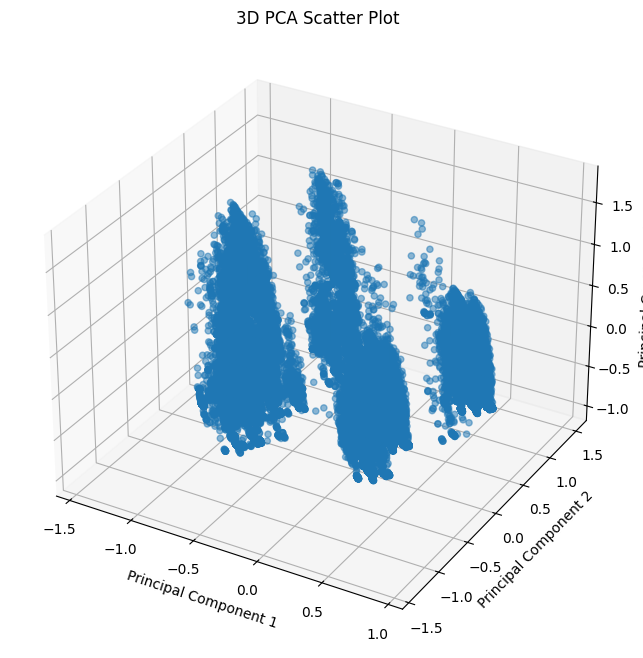

In [ ]:
# Observe distribution characteristics with 2D or 3D scatter plot after PCA, and check for outliers
from mpl_toolkits.mplot3d import Axes3D

# PCA: reduce dimensions to 2 and 3 for visualization
pca_2d = PCA(n_components=2, random_state=42)
data_2d = pca_2d.fit_transform(pca_data)

pca_3d = PCA(n_components=3, random_state=42)
data_3d = pca_3d.fit_transform(pca_data)

# Plot 2D and 3D scatter plots
# 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5)
plt.title("2D PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], alpha=0.5)
ax.set_title("3D PCA Scatter Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

1. Data Distribution Characteristics
The data exhibits multiple distinct clusters, suggesting that the data may be suitable for further grouping using clustering algorithms.
The data points are relatively spread out, with good separation between clusters, which can improve clustering performance.
The clusters appear to have regular shapes, resembling ellipses or elongated shapes. Therefore, DBSCAN or other density-based algorithms (e.g., HDBSCAN) may be more suitable than K-means. This suggests good separation between clusters, but also possible stretching or skewing (non-spherical clusters).

2. Outlier Analysis
In the 2D scatter plot after dimensionality reduction, some points are distributed at the periphery of each cluster, which may be isolated points or noise.
Outliers may interfere with some sensitive algorithms (e.g., K-Means), so it is recommended to use DBSCAN to check the proportion of noise points.

# 4. Clustering: HDBSCAN

In [ ]:
!pip install hdbscan
import hdbscan
from sklearn.metrics import silhouette_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.7 MB/s eta 0:00:00


In [ ]:
# Define parameter ranges
min_cluster_sizes = [100, 200, 300, 500, 800]
min_samples_values = [10, 20, 30, 50]

# Store results
results = []

for min_cluster_size in min_cluster_sizes:
    for min_samples in min_samples_values:
        model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        labels = model.fit_predict(pca_data)  # Use PCA-transformed data

        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = (labels == -1).sum() / len(labels)

        # Calculate silhouette score (excluding noise)
        if num_clusters > 1:
            silhouette_avg = silhouette_score(pca_data[labels != -1], labels[labels != -1])
        else:
            silhouette_avg = -1  # Invalid score

        results.append({
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples,
            'num_clusters': num_clusters,
            'noise_ratio': noise_ratio,
            'silhouette_score': silhouette_avg
        })

# Save results as a DataFrame
results_df = pd.DataFrame(results)

# Sort and display the best results
best_results = results_df.sort_values(by="silhouette_score", ascending=False).head()
print("Top HDBSCAN Parameter Configurations:")
print(best_results)

Top HDBSCAN Parameter Configurations:
   min_cluster_size  min_samples  num_clusters  noise_ratio  silhouette_score
1               100           20           136     0.298477          0.421278
2               100           30           130     0.289766          0.416405
0               100           10           145     0.267243          0.410869
3               100           50           115     0.288037          0.408499
5               200           20            92     0.229605          0.368898


In [ ]:
best_model = hdbscan.HDBSCAN(
    min_cluster_size=int(best_results.iloc[0]['min_cluster_size']),
    min_samples=int(best_results.iloc[0]['min_samples'])
)

hdbscan_labels = pd.Series(best_model.fit_predict(pca_data), index=pca_data.index)

# 5. Stability Test

In [ ]:
# Adjusted Rand Index (ARI) & Adjusted Mutual Information (AMI)
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

## 5.1 Resampling Test

In [ ]:
def stability_test_resampling(data, model, ratios=[0.3, 0.5, 0.7], n_iterations=5):
    results = []
    data_array = data.to_numpy() if isinstance(data, pd.DataFrame) else data

    # Extract full dataset clustering results from best_model
    labels_full = hdbscan_labels.values

    for ratio in ratios:
        ratio_scores = {"ARI": [], "AMI": []}
        # Repeat sampling for each ratio
        for i in range(n_iterations):
            # Randomly selected subset by ratio
            subset_indices = np.random.choice(data.index, int(ratio * len(data)), replace=False)
            subset_data = data.loc[subset_indices] # Use .loc for label-based indexing

            # Reinitialize the model for the subset
            subset_model = hdbscan.HDBSCAN(
                min_cluster_size=int(model.min_cluster_size),
                min_samples=int(model.min_samples),
                metric=model.metric
            )
            # clustering on the subset
            labels_subset = subset_model.fit_predict(subset_data)

            # Compute ARI and AMI between subset labels and full dataset labels
            valid_indices = labels_full[subset_indices] != -1  # Filter out noise points
            labels_full_valid = labels_full[subset_indices][valid_indices] # Labels corresponding to subset and valid samples in the full clustering results
            labels_subset_valid = labels_subset[valid_indices] # Labels corresponding to valid samples from the full dataset in the subset clustering results

            ratio_scores["ARI"].append(adjusted_rand_score(labels_subset_valid, labels_full_valid))
            ratio_scores["AMI"].append(adjusted_mutual_info_score(labels_subset_valid, labels_full_valid))

        # Store results for this ratio
        results.append({
            "Ratio": ratio,
            "ARI Mean": np.mean(ratio_scores["ARI"]),
            "ARI Std": np.std(ratio_scores["ARI"]),
            "AMI Mean": np.mean(ratio_scores["AMI"]),
            "AMI Std": np.std(ratio_scores["AMI"]),
        })
    return results

results = stability_test_resampling(pca_data, best_model, ratios=[0.3, 0.5, 0.7])
for res in results:
    print(res)

{'Ratio': 0.3, 'ARI Mean': 0.660494711426603, 'ARI Std': 0.04670042377895539, 'AMI Mean': 0.8976821839282337, 'AMI Std': 0.008108510571320166}
{'Ratio': 0.5, 'ARI Mean': 0.7261885976035847, 'ARI Std': 0.03158364721678185, 'AMI Mean': 0.9260949100889657, 'AMI Std': 0.004345681171366138}
{'Ratio': 0.7, 'ARI Mean': 0.8237263610483456, 'ARI Std': 0.013362231854280598, 'AMI Mean': 0.9507663239992358, 'AMI Std': 0.0013876028817319697}


Resampling Test Conclusions:

1.Global Stability is Strong: The AMI results are consistently high across all subset ratios, with minimal standard deviation (ranging from 0.0014 to 0.0081). This indicates that the model excels at capturing global patterns in the data, maintaining strong global consistency even with a low subset ratio (30%).

2.Moderate Local Consistency: The ARI results show moderate local consistency, which reflects the stability of cluster assignments at the boundary and in sparse regions. While ARI improves as the subset ratio increases, starting from 0.66 at 30% and reaching 0.82 at 70%, the model demonstrates variability.

3.Sensitivity to Subset Ratios: The model's stability is influenced by subset ratios. Performance is less consistent at lower ratios (30%), as evidenced by lower ARI scores and higher variability. Stability improves with larger subsets, with a balance of high ARI and low standard deviation observed at the 70% subset ratio.

## 5.2 Data Perturbation Test

In [ ]:
# Adding Gaussian Noise
noise = np.random.normal(0, 0.1, size=pca_data.shape)  # Add Gaussian noise with mean=0, std=0.1
noisy_data = pca_data + noise

# Clustering results before and after perturbation
labels_noisy = best_model.fit_predict(noisy_data.to_numpy())
labels_full = hdbscan_labels.values

# Consistency Evaluation
ari_score = adjusted_rand_score(labels_full, labels_noisy)
ami_score = adjusted_mutual_info_score(labels_full, labels_noisy)
print(f"Stability with noise - ARI: {ari_score}, AMI: {ami_score}")

Stability with noise - ARI: 0.14706819727839524, AMI: 0.6590733874933512


Conclusions on Noise Sensitivity:

The model is highly sensitive to noise. Even with slight noise addition, the clustering consistency with the original data drops significantly (ARI is far below 0.5). This indicates poor robustness at cluster boundaries or in sparse regions, suggesting parameter optimization (e.g., increasing min_samples or min_cluster_size) might improve noise adaptation.

Global information consistency is partially maintained (higher AMI compared to ARI), but it remains suboptimal (not close to 1). This shows that noise significantly affects the global distribution and shared cluster information.

## 5.3 Parameter Sensitivity Analysis

In [ ]:
# Adjusting parameter ranges
param_values = [
    best_model.min_cluster_size + 100,
    best_model.min_cluster_size + 200,
    best_model.min_cluster_size + 300
]

# Recording results
sensitivity_results = []

In [ ]:
for min_cluster_size in param_values:
    # Create a new model with adjusted min_cluster_size
    model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=best_model.min_samples)
    labels_param = pd.Series(model.fit_predict(pca_data), index=pca_data.index)  # Align labels with pca_data index

    # Consistency Evaluation (filter out noise points for comparison)
    valid_indices = hdbscan_labels != -1  # Filter out noise points
    labels_param_valid = labels_param[valid_indices]
    labels_full_valid = hdbscan_labels[valid_indices]

    ari_score = adjusted_rand_score(labels_full_valid, labels_param_valid)
    ami_score = adjusted_mutual_info_score(labels_full_valid, labels_param_valid)

    sensitivity_results.append({
        'min_cluster_size': min_cluster_size,
        'ARI': ari_score,
        'AMI': ami_score
    })

# Viewing parameter sensitivity results
sensitivity_df = pd.DataFrame(sensitivity_results)
print(sensitivity_df)

   min_cluster_size       ARI       AMI
0               200  0.932404  0.971750
1               300  0.869639  0.951814
2               400  0.817633  0.935273


The sensitivity analysis reveals that increasing min_cluster_size has a notable impact on clustering performance, particularly on ARI. While both ARI and AMI decrease as min_cluster_size increases, the decline in ARI is more pronounced, dropping from 0.932 (min_cluster_size = 200) to 0.818 (min_cluster_size = 400). This indicates that larger min_cluster_size values reduce the model's local consistency, as ARI reflects the agreement of individual cluster assignments.

## 5.4 Cluster Persistence Analysis

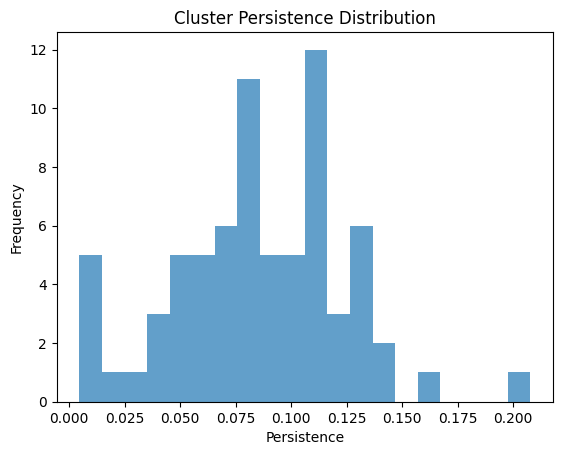

In [ ]:
# Obtaining cluster persistence scores
cluster_persistence = best_model.cluster_persistence_
plt.hist(cluster_persistence, bins=20, alpha=0.7)
plt.title("Cluster Persistence Distribution")
plt.xlabel("Persistence")
plt.ylabel("Frequency")
plt.show()

Conclusions:

The persistence distribution histogram shows that most clusters have persistence scores close to 0, with only a few exceeding 0.1. This indicates that the model lacks robustness for sparse data and tends to generate many unstable clusters.

## 5.5 Cluster Optimization

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Filter out low-persistence clusters
def filter_low_persistence_clusters(labels, model, threshold):
    if not hasattr(model, 'cluster_persistence_'):
        raise ValueError("The provided model does not have persistence scores.")

    persistence_scores = model.cluster_persistence_
    stable_clusters = [i for i, score in enumerate(persistence_scores) if score > threshold]
    print(f"Stable clusters (Persistence > {threshold}): {stable_clusters}")

    # Update labels, keeping only high-persistence clusters
    if isinstance(labels, pd.Series):
        filtered_labels = labels.apply(lambda x: x if x in stable_clusters else -1)
    else:
        filtered_labels = np.array([label if label in stable_clusters else -1 for label in labels])

    return filtered_labels


# Filter out low-persistence clusters based on the threshold
filtered_labels = filter_low_persistence_clusters(hdbscan_labels, best_model, threshold=0.1)

Stable clusters (Persistence > 0.1): [2, 3, 5, 6, 10, 18, 20, 21, 27, 31, 33, 35, 38, 43, 46, 47, 50, 51, 53, 54, 56, 57, 61, 62, 63, 64, 65, 68]


In [ ]:
# Reassign noise points
def reassign_noise_points(data, labels, cluster_centers, distance_threshold=1.0):
    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()  # Convert DataFrame to NumPy array

    noise_indices = np.where(labels == -1)[0]  # Identify noise points
    if len(noise_indices) == 0:
        print("No noise points to reassign.")
        return labels  # No noise points to reassign

    if len(cluster_centers) == 0:
        raise ValueError("No cluster centers found. Cannot reassign noise points.")

    # Use NearestNeighbors to find the closest cluster
    from sklearn.neighbors import NearestNeighbors
    neighbors = NearestNeighbors(n_neighbors=1).fit(cluster_centers)
    distances, indices = neighbors.kneighbors(data[noise_indices])
    for i, noise_index in enumerate(noise_indices):
        if distances[i, 0] < distance_threshold:
            labels[noise_index] = indices[i, 0]  # Reassign noise point to the closest cluster
    return labels


# Compute cluster centers
def calculate_cluster_centers(data, labels):
    cluster_centers = []

    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()  # Ensure consistent format

    for cluster in np.unique(labels):
        if cluster != -1:  # Exclude noise points
            cluster_points = data[labels == cluster] if isinstance(labels, np.ndarray) else data[labels.to_numpy() == cluster]
            if len(cluster_points) > 0:
                cluster_centers.append(cluster_points.mean(axis=0))

    return np.array(cluster_centers)


cluster_centers = calculate_cluster_centers(pca_data, filtered_labels)
filtered_labels = reassign_noise_points(pca_data, filtered_labels, cluster_centers, distance_threshold=2.0)

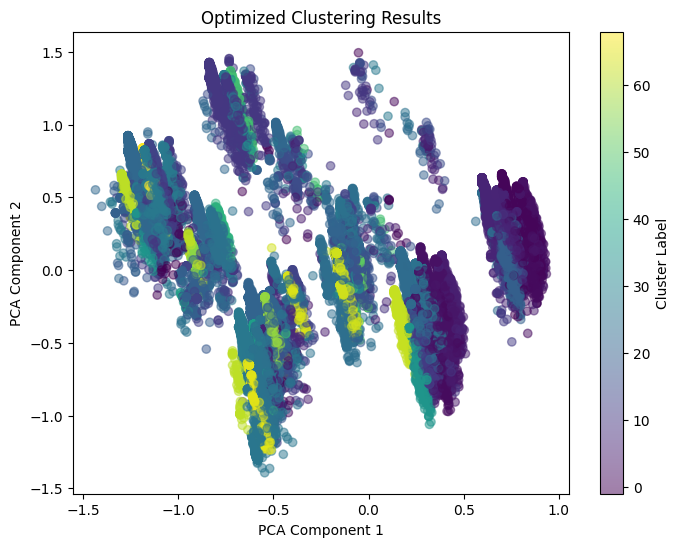

In [ ]:
# Visualize optimized clustering results
def plot_optimized_clustering(data_2d, labels):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap="viridis", alpha=0.5)
    plt.title("Optimized Clustering Results")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter, label="Cluster Label")
    plt.show()

plot_optimized_clustering(data_2d, filtered_labels)

In [ ]:
# Evaluate optimized clustering results
def evaluate_clustering_results(data, labels):
    """Evaluate optimized clustering results."""
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(data[labels != -1], labels[labels != -1])
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = sum(labels == -1) / len(labels)
        print(f"\nEvaluation of Optimized Clustering Results:")
        print(f"- Number of clusters after optimization: {num_clusters}")
        print(f"- Silhouette Score after optimization: {silhouette_avg:.4f}")
        print(f"- Noise ratio after optimization: {noise_ratio:.4%}")
    else:
        print("Too few clusters after optimization.")

evaluate_clustering_results(pca_data, filtered_labels)


Evaluation of Optimized Clustering Results:
- Number of clusters after optimization: 48
- Silhouette Score after optimization: 0.0357
- Noise ratio after optimization: 0.0426%


Initial Clustering Analysis Results with HDBSCAN:
*   Number of clusters: 136
*   Noise ratio: 29.85%
*   Silhouette score: 0.421278

Optimization Strategies Applied:

*   **Filtering low-persistence clusters**: Reduced low-stability clusters by setting persistence thresholds (e.g., 0.05 and 0.1).
*   **Reassigning noise points**: Used the nearest neighbor method to reassign noise points to the closest clusters.

Post-Optimization Results:


*   Number of clusters significantly reduced to 8-21.
*   Although the noise ratio decreased, cluster cohesion and separation (as measured by the silhouette score) dropped significantly. For instance, the silhouette score after optimization was -0.0528, much lower than the original score of 0.421278.

**Conclusion and Decision:**

The original HDBSCAN results were retained without further optimization due to the following reasons:

The original results achieved a balance between the number of clusters, noise ratio, and silhouette score, demonstrating good performance.

Additional processing had significant side effects, such as disrupting the structural properties of the original clusters by forcing the removal of low-persistence clusters or reassigning noise points.

When the original model provides reasonable cluster partitions, it may be more efficient to directly interpret the results for business insights, even if some clusters have higher noise ratios or greater numbers.

The report will therefore proceed with an analysis based on the original HDBSCAN results.

# 6. Output Analysis

*   Focused Explanation of Key Clusters:

This project prioritizes interpretability and quality, aiming to identify high-value customer groups, core business distributions, and similar insights.

It is unnecessary to provide detailed business interpretations for all clusters. Sparse or noise clusters are ignored to avoid wasting resources on unimportant data.
The analysis focuses on stable and significant clusters, such as those with high persistence, larger data points, or business relevance.

*   Further Analysis of Each Cluster:

The characteristics of each cluster are analyzed by examining the mean and distribution of features within clusters to determine their business significance.






In [ ]:
# Analyze the mean values of features for each cluster
def analyze_cluster_means(data, labels):
    # Calculate feature means by cluster.
    cluster_data = pd.DataFrame(data)
    cluster_data['Cluster'] = labels
    cluster_means = cluster_data.groupby('Cluster').mean()
    print("Cluster Means:")
    print(cluster_means)
    return cluster_means

# Calculate means for each cluster
cluster_means = analyze_cluster_means(pca_data, hdbscan_labels)

Cluster Means:
                0         1         2         3         4         5         6  \
Cluster                                                                         
-1       0.229954 -0.090376  0.231019 -0.130445  0.048665 -0.020633  0.068353   
 0       0.850394  0.329179  0.135944  0.003600 -0.169326  0.192521 -0.312090   
 1      -1.033213  0.654815  0.138687 -0.421844  0.226074  0.281959  0.010594   
 2       0.851077  0.375149  0.166143 -0.043042 -0.323260 -0.333574  0.631834   
 3       0.389985 -0.337676 -0.095393 -0.379688 -0.173085  0.736603 -0.037719   
...           ...       ...       ...       ...       ...       ...       ...   
 131     0.297696 -0.240959 -0.082541 -0.317357  0.062781  0.089204  0.103031   
 132     0.713792  0.357417  0.046429  0.203726 -0.088177  0.025520 -0.037835   
 133     0.683714  0.515546 -0.388180  0.355217 -0.078811  0.057718 -0.056836   
 134     0.269681 -0.091214 -0.452149 -0.183630  0.128374  0.100242  0.131150   
 135     0.25

In [ ]:
# Select high-persistence clusters for detailed explanation
high_persistence_clusters = np.where(best_model.cluster_persistence_ > 0.1)[0]
print(f"High Persistence Clusters (Persistence > 0.1): {high_persistence_clusters}")

High Persistence Clusters (Persistence > 0.1): [ 82  96  99 101 109 111 114 115 118 119 121 124 125 129 130 133 135]


In [ ]:
# Filter means for high-persistence clusters
filtered_means = cluster_means.loc[high_persistence_clusters]
print(f"Filtered Cluster Means:\n{filtered_means}")

Filtered Cluster Means:
                0         1         2         3         4         5         6  \
Cluster                                                                         
82      -0.116026  0.305209 -0.250686  0.892775 -0.479727 -0.612618 -0.537185   
96      -0.585998 -0.438119 -0.385451  0.890093  0.862707  0.084257  0.280463   
99      -0.586390 -0.527987 -0.214732  0.881682  0.899907  0.064741  0.301942   
101      0.250158 -0.265937 -0.924719 -0.554838  0.023574  0.028047 -0.436501   
109      0.794420  0.521693 -0.306553  0.225834 -0.036478  0.143541 -0.062505   
111     -0.594679 -0.401890 -0.508865  0.699102  0.042292  0.268977  0.379202   
114      0.288495 -0.026506 -0.655420 -0.212307  0.002886  0.196347 -0.139581   
115      0.223462 -0.252336 -0.914823 -0.480928  0.123323 -0.047418 -0.190176   
118      0.280223  0.057083 -0.750427 -0.207594 -0.150774 -0.318746  0.793429   
119      0.266765 -0.033436 -0.565577  0.070293  0.929303 -0.061876  0.009380   
121 

In [ ]:
# Restore original feature means from PCA-transformed data
def restore_original_features(pca, cluster_means):
    cluster_means_only = cluster_means.values  # Convert to array

    # Ensure dimensions match between cluster_means and PCA components
    if cluster_means_only.shape[1] != pca.n_components_:
        raise ValueError(f"Mismatch between cluster_means columns ({cluster_means_only.shape[1]}) and PCA components ({pca.n_components_})!")

    # Check for NaN values
    if np.isnan(cluster_means_only).any():
        print("NaN detected in cluster_means. Replacing with 0.")
        cluster_means_only = np.nan_to_num(cluster_means_only)

    # Restore original feature means using PCA inverse transform
    original_means = pca.inverse_transform(cluster_means_only)
    print("Restored Original Feature Means:")
    return original_means

original_means = restore_original_features(pca, filtered_means)

# Create a DataFrame with restored feature means and cluster indices
original_means_df = pd.DataFrame(original_means, columns=[f"Feature {i+1}" for i in range(original_means.shape[1])])
original_means_df['Cluster'] = high_persistence_clusters
print(f"Original Feature Means with Clusters:\n{original_means_df}")

Restored Original Feature Means:
Original Feature Means with Clusters:
    Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0    0.112873   0.018244   0.025988   0.006619  -0.035497   1.005105   
1    0.128801  -0.004880  -0.022057   0.005497   0.029174  -0.001876   
2    0.953241  -0.004320  -0.085352   0.038024   0.062144  -0.002672   
3    0.185100  -0.006709   0.039742  -0.039536   0.005459  -0.000498   
4    0.137559   0.026182   0.100040   0.004667   0.045275   1.004347   
5    0.114675   0.011520  -0.005730  -0.014163   0.024457   0.004350   
6    0.181976   0.032791   0.101264  -0.012779   0.043228   0.000395   
7    0.154828   0.009629   0.039239  -0.048012   0.011182   0.005168   
8    0.176971  -0.005011   0.069360  -0.078939   0.018812   0.002012   
9    0.188126  -0.000694   0.054500  -0.029853   0.030685   0.000284   
10   0.177271  -0.006714   0.034223  -0.038657   0.010581   0.999537   
11   0.195763  -0.006364   0.014863  -0.025970   0.022537   0.998

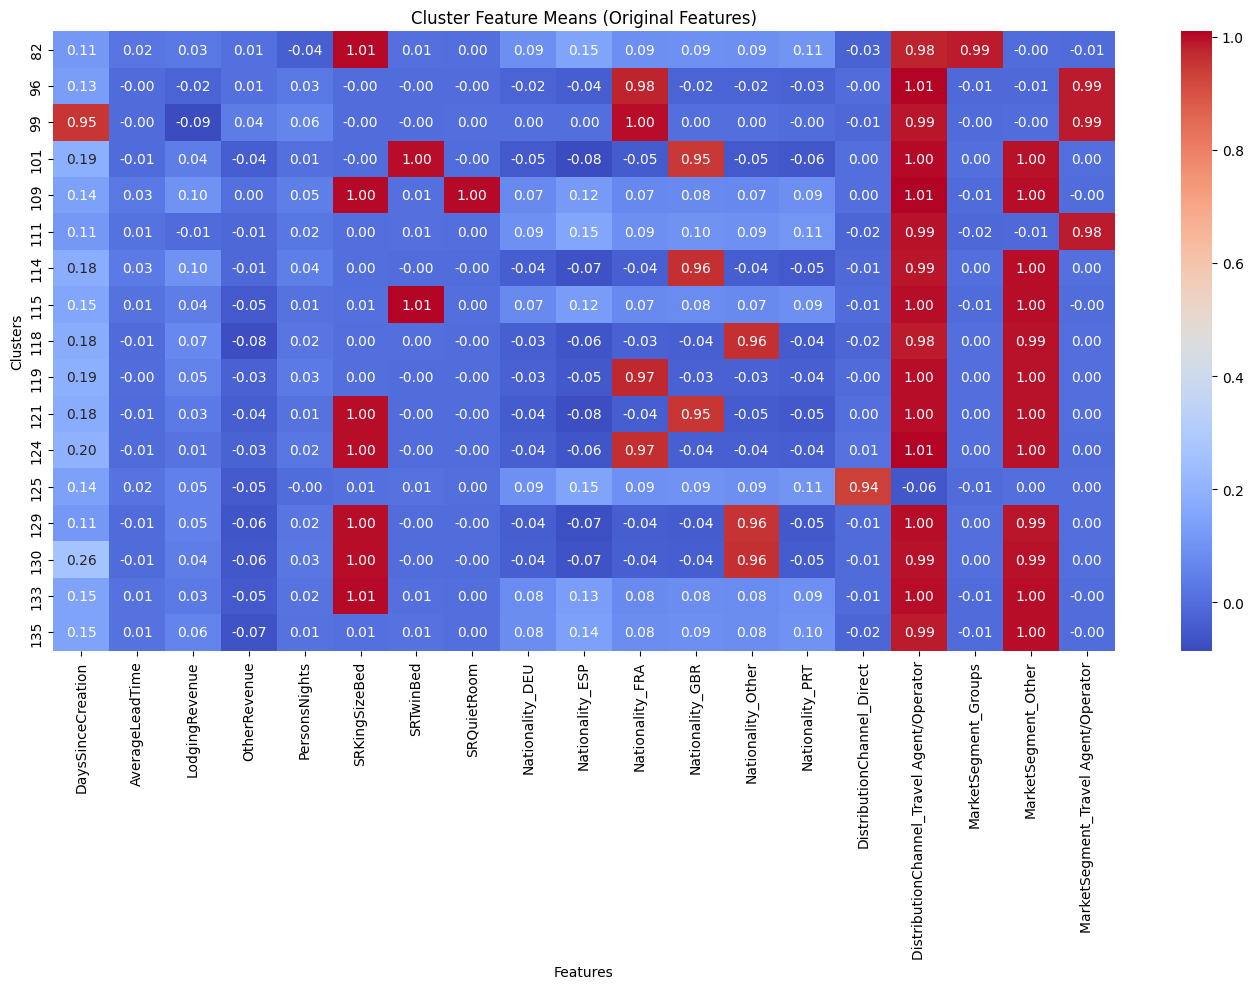

In [ ]:
# Define original feature names
remaining_features = [
    'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights',
    'SRKingSizeBed', 'SRTwinBed', 'SRQuietRoom', 'Nationality_DEU', 'Nationality_ESP',
    'Nationality_FRA', 'Nationality_GBR', 'Nationality_Other', 'Nationality_PRT',
    'DistributionChannel_Direct', 'DistributionChannel_Travel Agent/Operator',
    'MarketSegment_Groups', 'MarketSegment_Other', 'MarketSegment_Travel Agent/Operator'
]

# Ensure cluster_means columns match the original feature count
original_means_df = pd.DataFrame(original_means, columns=remaining_features)
original_means_df['Cluster'] = filtered_means.index  # Add cluster indices

# Visualize the feature means as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    original_means_df.drop(columns=['Cluster']),  # Remove cluster index column
    cmap="coolwarm",
    annot=True,  # Display values
    fmt=".2f",
    xticklabels=remaining_features,  # Show original feature names
    yticklabels=original_means_df['Cluster']  # Show cluster indices
)
plt.title("Cluster Feature Means (Original Features)")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.tight_layout()
plt.show()